<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_01_ProjOne_Supervised_Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [80]:
# utils
import os, sys, warnings, itertools
import pandas as pd
import numpy as np
# colab
from google.colab import drive
# sklearn
from sklearn.model_selection import train_test_split
from sklearn import (metrics, linear_model)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
# vis
import matplotlib.pyplot as plt
import seaborn as sns

## Setting

In [81]:
warnings.filterwarnings('ignore')

In [82]:
# mount google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# working directory
working_dir = '/content/drive/MyDrive/Jupyter Notebooks/'
os.chdir(working_dir)

# Dataset

In [84]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
path = "Inputs/"

In [85]:
attr = {
    'cap-shape':                ['bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s'],
    'cap-surface':              ['fibrous=f,grooves=g,scaly=y,smooth=s'],
    'cap-color':                ['brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y'],
    'bruises':                  ['bruises=t,no=f'],
    'odor':                     ['almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s'],
    'gill-attachment':          ['attached=a,descending=d,free=f,notched=n'],
    'gill-spacing':             ['close=c,crowded=w,distant=d'],
    'gill-size':                ['broad=b,narrow=n'],
    'gill-color':               ['black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y'],
    'stalk-shape':              ['enlarging=e,tapering=t'],
    'stalk-root':               ['bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?'],
    'stalk-surface-above-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-surface-below-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-color-above-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'stalk-color-below-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'veil-type':                ['partial=p,universal=u'],
    'veil-color':               ['brown=n,orange=o,white=w,yellow=y'],
    'ring-number':              ['none=n,one=o,two=t'],
    'ring-type':                ['cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z'],
    'spore-print-color':        ['black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y'],
    'population':               ['abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y'],
    'habitat':                  ['grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'],
}
print("Number of feaures:", len(attr))

Number of feaures: 22


In [86]:
for key, val in attr.items():
    attr[key] = val[0].split(",")

In [87]:
for key, value in attr.items():
    print(f"{key}:, {value}")

cap-shape:, ['bell=b', 'conical=c', 'convex=x', 'flat=f', 'knobbed=k', 'sunken=s']
cap-surface:, ['fibrous=f', 'grooves=g', 'scaly=y', 'smooth=s']
cap-color:, ['brown=n', 'buff=b', 'cinnamon=c', 'gray=g', 'green=r', 'pink=p', 'purple=u', 'red=e', 'white=w', 'yellow=y']
bruises:, ['bruises=t', 'no=f']
odor:, ['almond=a', 'anise=l', 'creosote=c', 'fishy=y', 'foul=f', 'musty=m', 'none=n', 'pungent=p', 'spicy=s']
gill-attachment:, ['attached=a', 'descending=d', 'free=f', 'notched=n']
gill-spacing:, ['close=c', 'crowded=w', 'distant=d']
gill-size:, ['broad=b', 'narrow=n']
gill-color:, ['black=k', 'brown=n', 'buff=b', 'chocolate=h', 'gray=g', 'green=r', 'orange=o', 'pink=p', 'purple=u', 'red=e', 'white=w', 'yellow=y']
stalk-shape:, ['enlarging=e', 'tapering=t']
stalk-root:, ['bulbous=b', 'club=c', 'cup=u', 'equal=e', 'rhizomorphs=z', 'rooted=r', 'missing=?']
stalk-surface-above-ring:, ['fibrous=f', 'scaly=y', 'silky=k', 'smooth=s']
stalk-surface-below-ring:, ['fibrous=f', 'scaly=y', 'silky=k

In [88]:
df = pd.read_csv(path + 'agaricus-lepiota.data', header=None)
df.columns = ['class'] + list(attr.keys())
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [90]:
df.isna().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [91]:
X = df.drop('class', axis=1, inplace=False)
y = df['class']

In [92]:
df['class'].describe()

,class
count,8124
unique,2
top,e
freq,4208


In [93]:
df.groupby(['class'])['class'].describe()

,count,unique,top,freq
class,,,,
e,4208,1,e,4208
p,3916,1,p,3916


In [94]:
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 8124 non-null   bool 
 1   cap-shape_f                 8124 non-null   bool 
 2   cap-shape_k                 8124 non-null   bool 
 3   cap-shape_s                 8124 non-null   bool 
 4   cap-shape_x                 8124 non-null   bool 
 5   cap-surface_g               8124 non-null   bool 
 6   cap-surface_s               8124 non-null   bool 
 7   cap-surface_y               8124 non-null   bool 
 8   cap-color_c                 8124 non-null   bool 
 9   cap-color_e                 8124 non-null   bool 
 10  cap-color_g                 8124 non-null   bool 
 11  cap-color_n                 8124 non-null   bool 
 12  cap-color_p                 8124 non-null   bool 
 13  cap-color_r                 8124 non-null   bool 
 14  cap-colo

In [95]:
def remove_colinear_cols(X):
    cols = list(X.columns)
    print("Numer of features (before):", len(cols))

    for col in cols:
        for icol in cols:
            if(col!=icol):
                rsq = np.corrcoef(X[col], X[icol])[0,1]**2
                if((rsq >=0.7) | (rsq <= -0.7)):
                    cols.remove(icol)
    print('Number of features (after):', len(cols))
    return cols, X[cols]

non_colinear_cols, X = remove_colinear_cols(X)

Numer of features (before): 95
Number of features (after): 85


In [96]:
variances = X.var()
variance_threshold = 0.01
low_variance_columns = variances[variances <= variance_threshold].index
X.drop(columns=low_variance_columns, inplace=True)
print('Number of features:', len(X.columns))

Number of features: 68


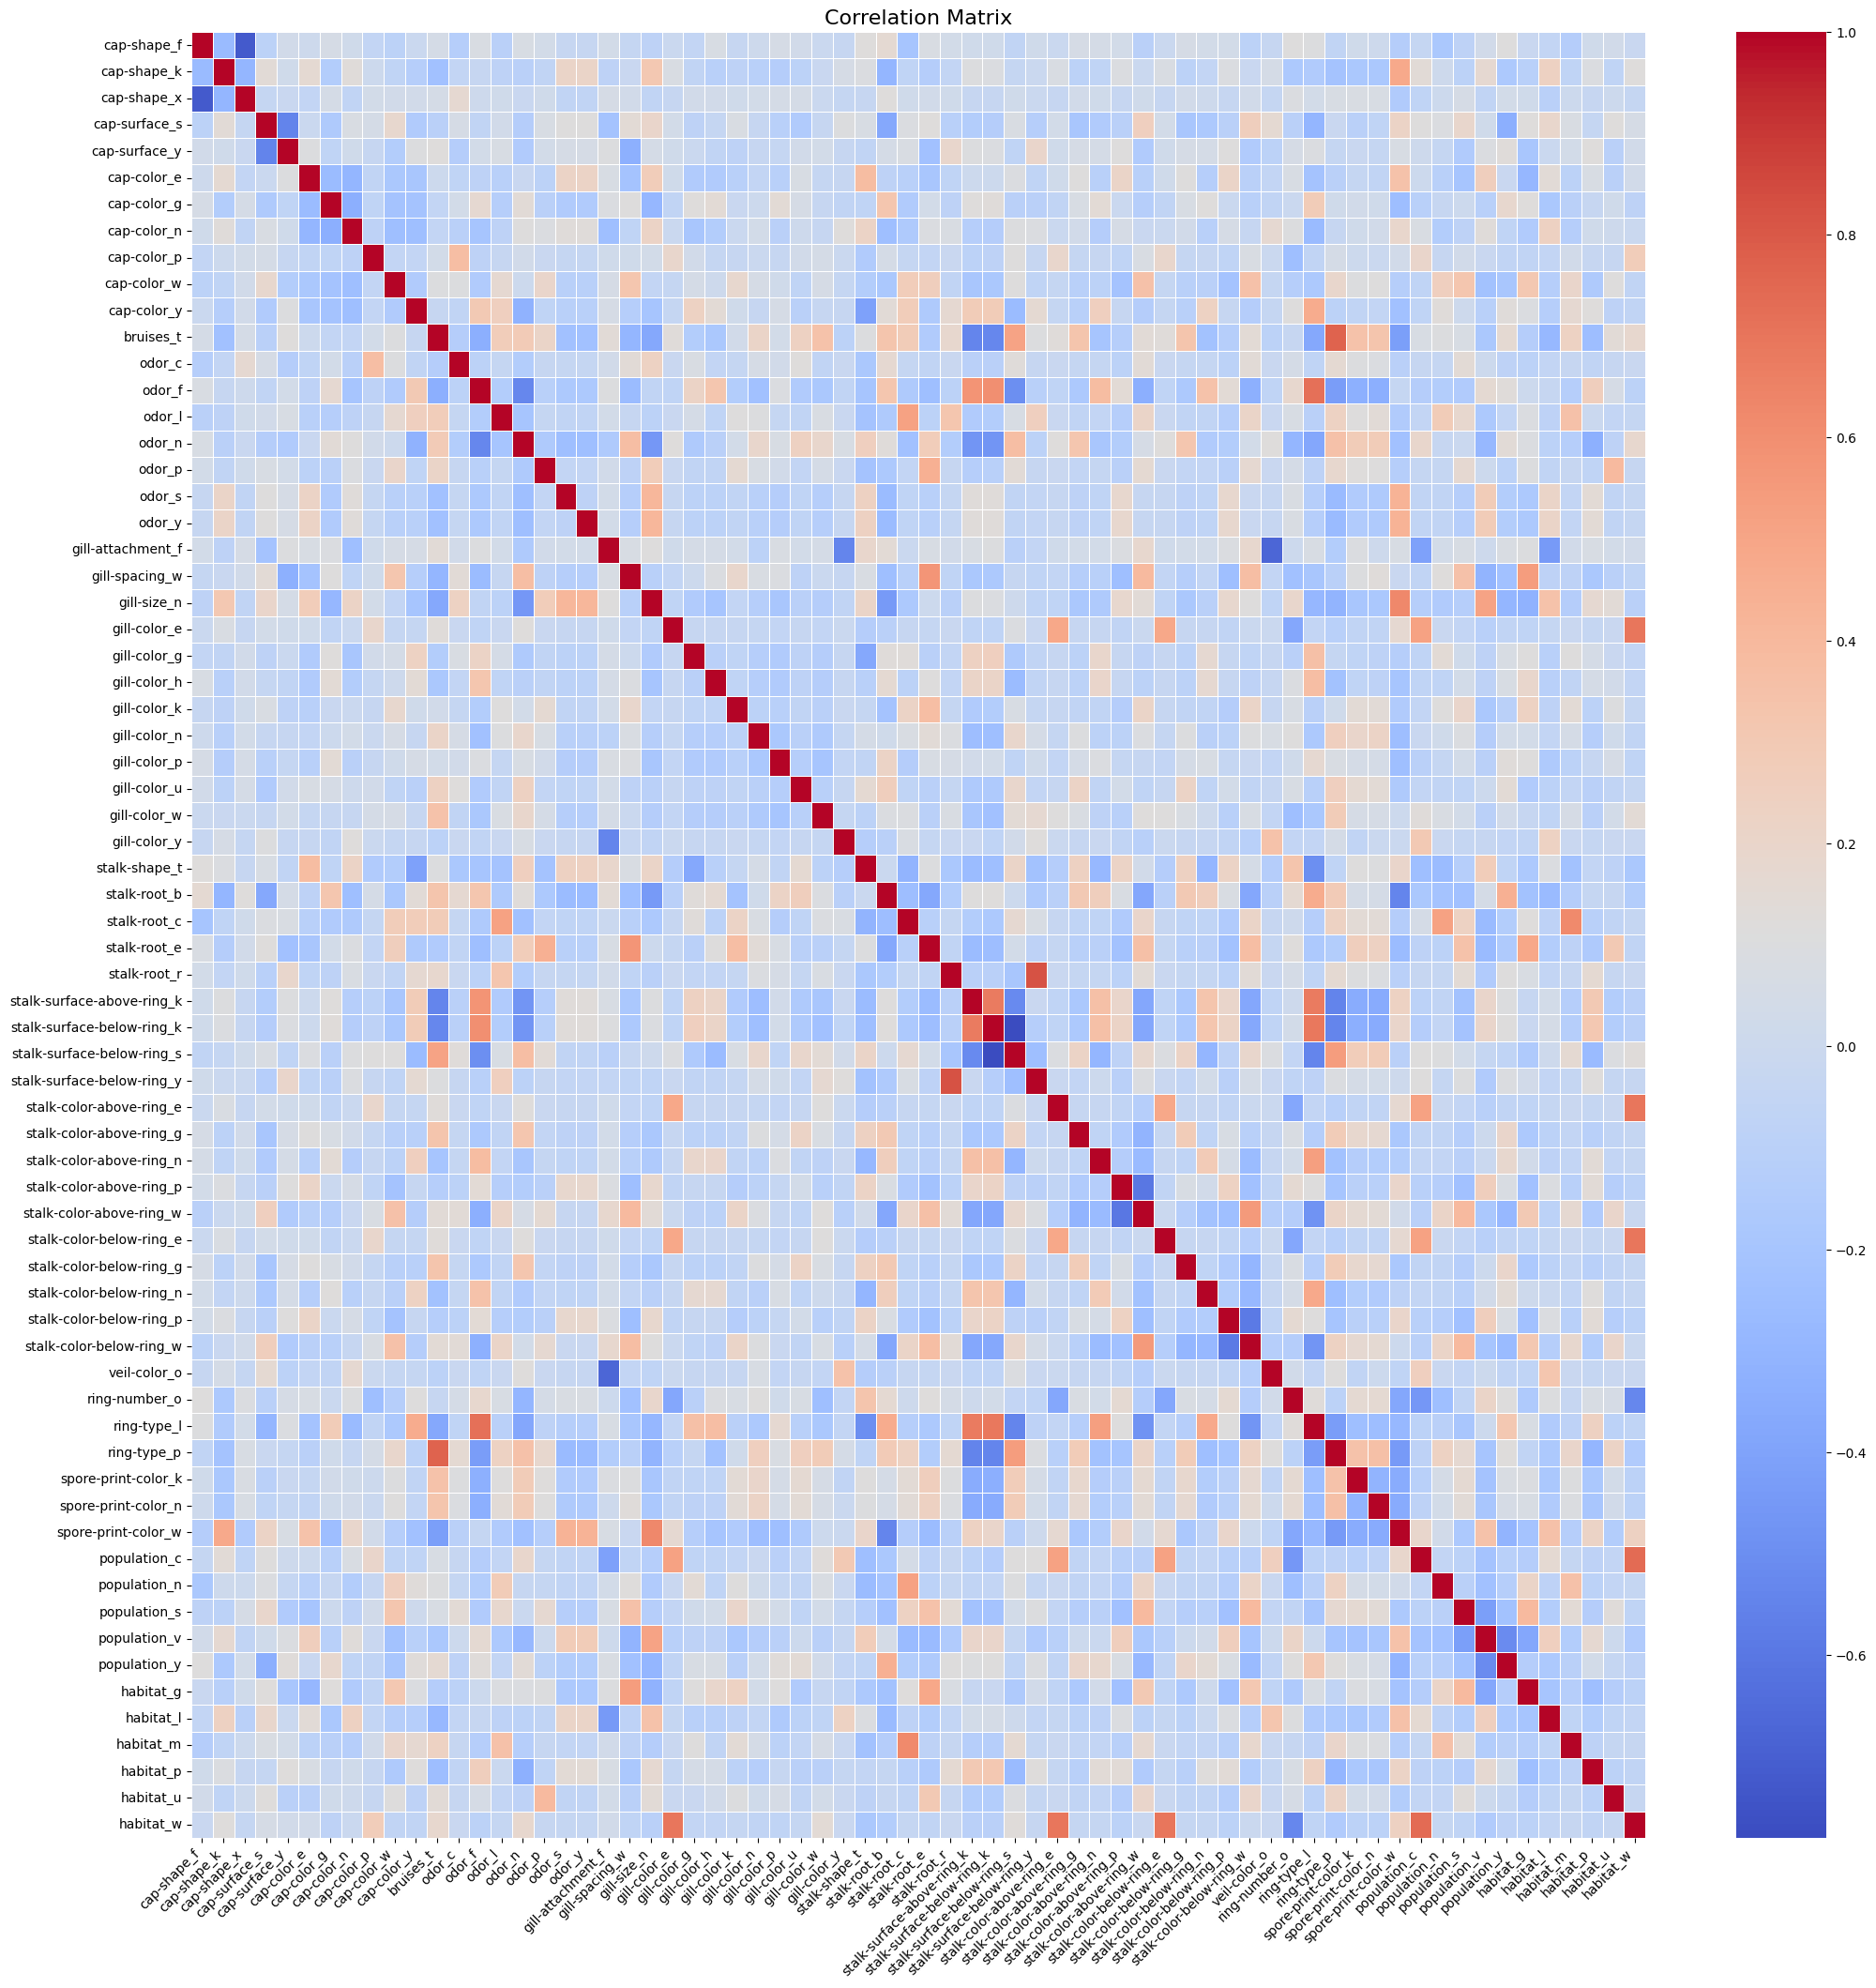

In [97]:
corr = X.corr()
fig = plt.figure(figsize=(25, 25))
sns.heatmap(corr.round(2), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [98]:
X = X.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y)

print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_train shape: (6093, 68) 
y_train shape: (6093,)
x_test shape: (2031, 68) 
y_test shape: (2031,)


In [99]:
results = []

In [100]:
def fit_predict(clf):
    print(clf)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acu = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ", acu)
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)
    return acu, cm

for clf, name in (
                (linear_model.LogisticRegression(penalty='l2', tol=1e-2, solver='liblinear'), 'Logistic Regression Classifier'),
                (linear_model.RidgeClassifier(alpha=0.5, tol=1e-2, solver='auto'), 'Ridge Classifier'),
                (linear_model.Perceptron(penalty='elasticnet', max_iter=50), 'Perceptron'),
                (linear_model.PassiveAggressiveClassifier(tol=1e-2, max_iter=50), 'Passive Aggresive Classifier'),
                (LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5), 'LDA'),
                (QuadraticDiscriminantAnalysis(reg_param=0.5), 'QDA')
                ):
    print(name, end=":\n")
    results.append((fit_predict(clf), name))
    print("-"*50)
print("\n")

Logistic Regression Classifier:
LogisticRegression(solver='liblinear', tol=0.01)
Accuracy:  0.9980305268340719
Confusion matrix:
 [[1044    0]
 [   4  983]]
--------------------------------------------------
Ridge Classifier:
RidgeClassifier(alpha=0.5, tol=0.01)
Accuracy:  0.9980305268340719
Confusion matrix:
 [[1044    0]
 [   4  983]]
--------------------------------------------------
Perceptron:
Perceptron(max_iter=50, penalty='elasticnet')
Accuracy:  0.9931068439192516
Confusion matrix:
 [[1036    8]
 [   6  981]]
--------------------------------------------------
Passive Aggresive Classifier:
PassiveAggressiveClassifier(max_iter=50, tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1044    0]
 [   0  987]]
--------------------------------------------------
LDA:
LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr')
Accuracy:  0.9857213195470211
Confusion matrix:
 [[1039    5]
 [  24  963]]
--------------------------------------------------
QDA:
QuadraticDiscriminantAnalysis(reg_para

In [101]:
for penalty in ['l2', 'l1', 'elasticnet']:
    print('SGD Classifier: %s penalty' % penalty.upper())
    print("-"*50)
    results.append((fit_predict(linear_model.SGDClassifier(alpha=1e-2, max_iter=50, penalty=penalty)), 'SGD Classifier'))

SGD Classifier: L2 penalty
--------------------------------------------------
SGDClassifier(alpha=0.01, max_iter=50)
Accuracy:  0.983259478089611
Confusion matrix:
 [[1044    0]
 [  34  953]]
SGD Classifier: L1 penalty
--------------------------------------------------
SGDClassifier(alpha=0.01, max_iter=50, penalty='l1')
Accuracy:  0.982767109798129
Confusion matrix:
 [[1044    0]
 [  35  952]]
SGD Classifier: ELASTICNET penalty
--------------------------------------------------
SGDClassifier(alpha=0.01, max_iter=50, penalty='elasticnet')
Accuracy:  0.9842442146725751
Confusion matrix:
 [[1044    0]
 [  32  955]]
